In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns = ['Serial No.'],inplace=True)# permanent change

In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

tensorflow.random.set_seed(42)

In [ ]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))


# model.add(Dense(14,activation="relu",input_dim=7))
# model.add(Dense(8,activation="relu"))
# model.add(Dense(4,activation="relu"))
# model.add(Dense(1,activation="linear"))


In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 7)                 56        
                                                                 
 dense_104 (Dense)           (None, 7)                 56        
                                                                 
 dense_105 (Dense)           (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [ ]:
history = model.fit(X_train_trf,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
7/7 [==============================] - 1s 39ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 4/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 5/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 7/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 10/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 11/200
7/7 [========

In [ ]:
y_pred = model.predict(X_test_trf)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[0.78469104],
       [0.7972966 ],
       [0.85865873],
       [0.8898252 ],
       [0.6904012 ],
       [0.88761234],
       [0.63802016],
       [0.7379795 ],
       [0.9160802 ],
       [0.59858596],
       [0.6849551 ],
       [0.72116244],
       [0.6393781 ],
       [0.53199434],
       [0.62143624],
       [0.69455564],
       [0.85019034],
       [0.6193639 ],
       [0.6080162 ],
       [0.8208292 ],
       [0.6727913 ],
       [0.8314182 ],
       [0.49709168],
       [0.79651695],
       [0.4881777 ],
       [0.73657066],
       [0.78036886],
       [0.7730709 ],
       [0.51128995],
       [0.9816128 ],
       [0.88845557],
       [0.7794055 ],
       [0.727748  ],
       [0.6911099 ],
       [0.52730685],
       [0.51691175],
       [0.63401145],
       [0.7959568 ],
       [0.92897147],
       [0.45792907],
       [0.6060239 ],
       [0.6419552 ],
       [0.76166505],
       [0.58593595],
       [0.8033407 ],
       [0.37494096],
       [0.6444919 ],
       [0.861

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7905595424568349

Epoch 1/100
7/7 [==============================] - 1s 27ms/step - loss: 0.2805 - val_loss: 0.2291
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2319 - val_loss: 0.1894
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1887 - val_loss: 0.1520
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1485 - val_loss: 0.1164
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1100 - val_loss: 0.0843
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0764 - val_loss: 0.0577
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0496 - val_loss: 0.0376
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0306 - val_loss: 0.0242
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0189 - val_loss: 0.0174
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0138 - val_loss: 0.0146
Epoch 11/100
7/7 [========

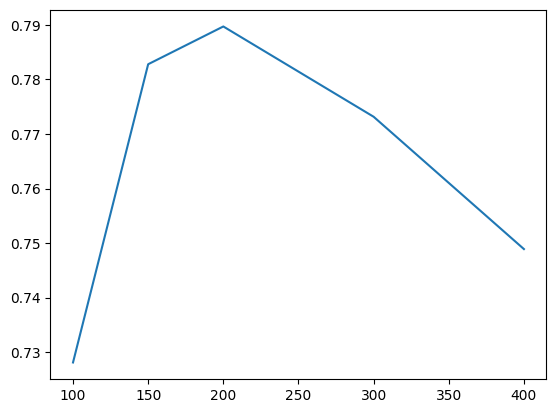

In [ ]:
#Function to find out optimum number of epochs
ep=[100,150,200,300,400]
r2=[]
for i in ep:
  history = model.fit(X_train_trf,y_train,epochs=i,validation_split=0.2)
  y_pred = model.predict(X_test_trf)
  r2.append(r2_score(y_test,y_pred))
plt.plot(ep,r2)

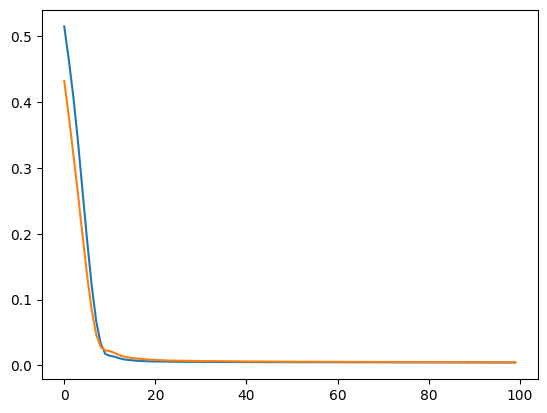

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
r2

[0.7281040004425644,
 0.7827850187208384,
 0.7897061971009127,
 0.7731558888239999,
 0.7488946845343041]

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Load the dataframe
df = pd.read_csv('/content/drive/MyDrive/Admission_Predict.csv')

# Drop the 'Serial No.' column
df.drop(columns=['Serial No.'], inplace=True)

# Split the data into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Scale the features using Min-Max scaler
scaler = MinMaxScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=7))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_trf, y_train, epochs=200, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test_trf)

# Calculate the R2 score
r2_score_result = r2_score(y_test, y_pred)
print("R2 Score:", r2_score_result)


Epoch 1/200
7/7 [==============================] - 1s 24ms/step - loss: 0.6921 - val_loss: 0.4494
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 0.4041 - val_loss: 0.2626
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.2204 - val_loss: 0.1315
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0914 - val_loss: 0.0558
Epoch 5/200
7/7 [==============================] - 0s 9ms/step - loss: 0.0325 - val_loss: 0.0450
Epoch 6/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0323 - val_loss: 0.0496
Epoch 7/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0302 - val_loss: 0.0382
Epoch 8/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0210 - val_loss: 0.0302
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0170 - val_loss: 0.0271
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0156 - val_loss: 0.0241
Epoch 11/200
7/7 [========